In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
import os
from ydata_profiling import ProfileReport

/tmp/ipykernel_20/1254798637.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
#shape of the data(rows,columns)
df.shape

(1000, 8)

In [4]:
# shows non-null values and dtypes in a single 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# Displays all the data types of the columns in df
df.dtypes


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [7]:
#To find the percentage of missing data in the dataframe for each column
df.isnull().sum()*100/len(df)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [8]:
# finding duplicated values
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [9]:
# the describtion of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [10]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [11]:
columns = ['gender','race/ethnicity','parental level of education','lunch']
for col in columns:
    print(df[col].value_counts().to_frame())


        count
gender       
female    518
male      482
                count
race/ethnicity       
group C           319
group D           262
group B           190
group E           140
group A            89
                             count
parental level of education       
some college                   226
associate's degree             222
high school                    196
some high school               179
bachelor's degree              118
master's degree                 59
              count
lunch              
standard        645
free/reduced    355


In [12]:
profile=ProfileReport(df,title='Profile Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

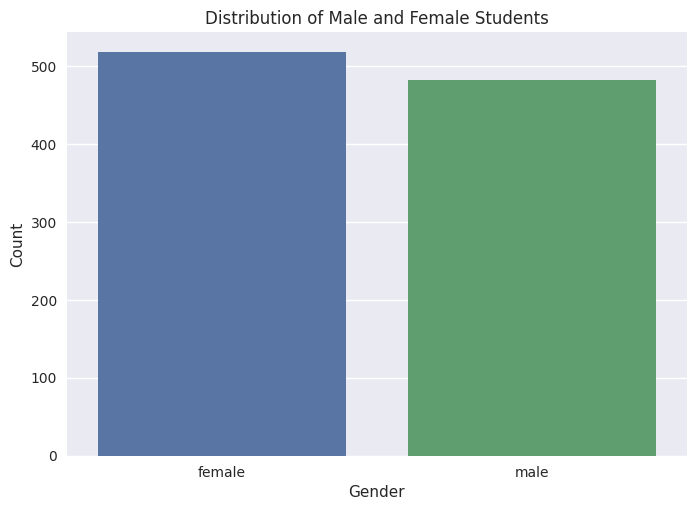

In [13]:
# Distribution of Male and Female Students

sns.countplot(data=df,x=df['gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Male and Female Students')
plt.show()

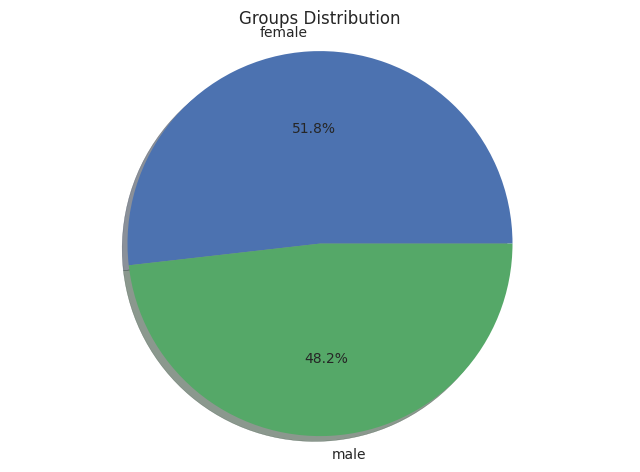

In [14]:
plt.pie(df['gender'].value_counts().values,autopct='%1.1f%%',labels=df['gender'].value_counts().index,shadow=True)
plt.axis('equal') 
plt.title('Groups Distribution')
plt.show()

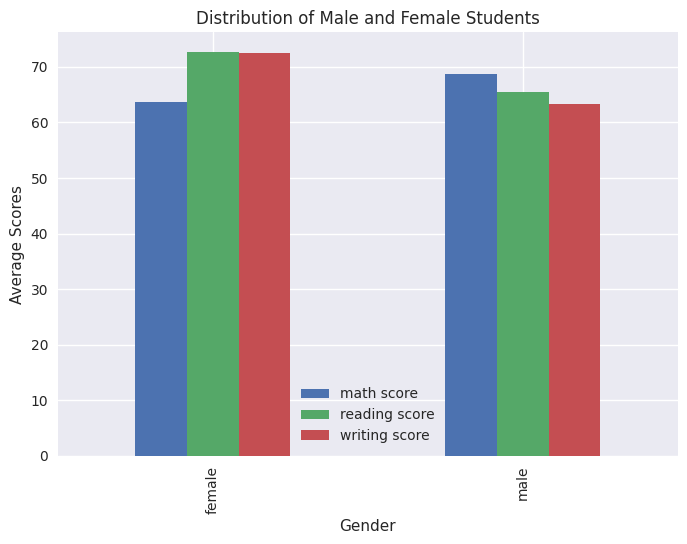

In [15]:
# Average Scores by Gender
scores = df.groupby('gender')[['math score','reading score','writing score']].mean()
scores.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Average Scores')
plt.title('Distribution of Male and Female Students')
plt.show()

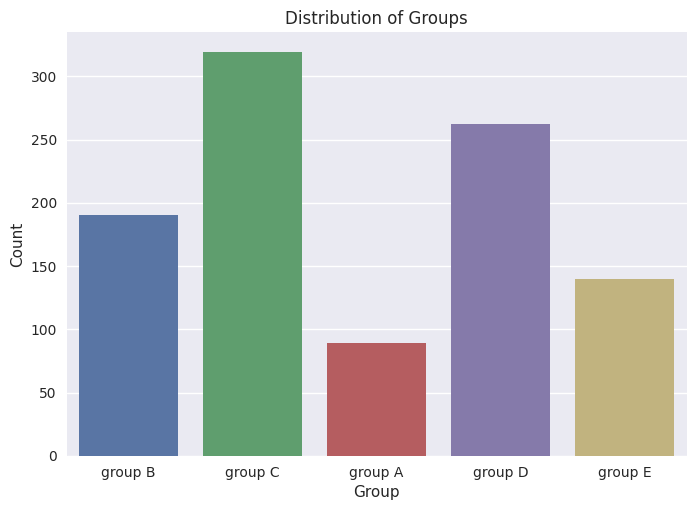

In [16]:
# Distribution of Groups

sns.countplot(data=df,x=df['race/ethnicity'])
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Distribution of Groups')
plt.show()

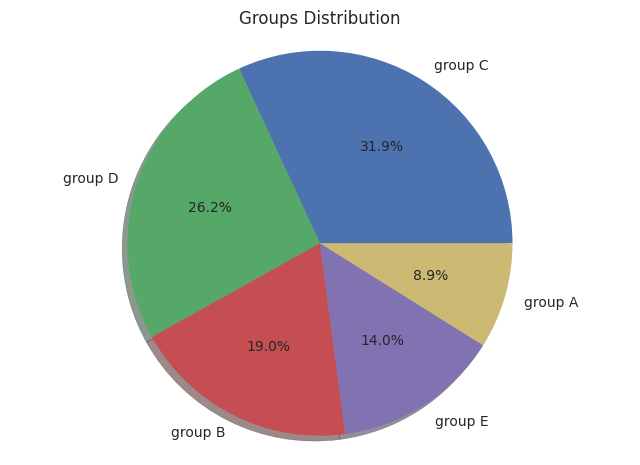

In [17]:
plt.pie(df['race/ethnicity'].value_counts().values,autopct='%1.1f%%',labels=df['race/ethnicity'].value_counts().index,shadow=True)
plt.axis('equal') 
plt.title('Groups Distribution')
plt.show()

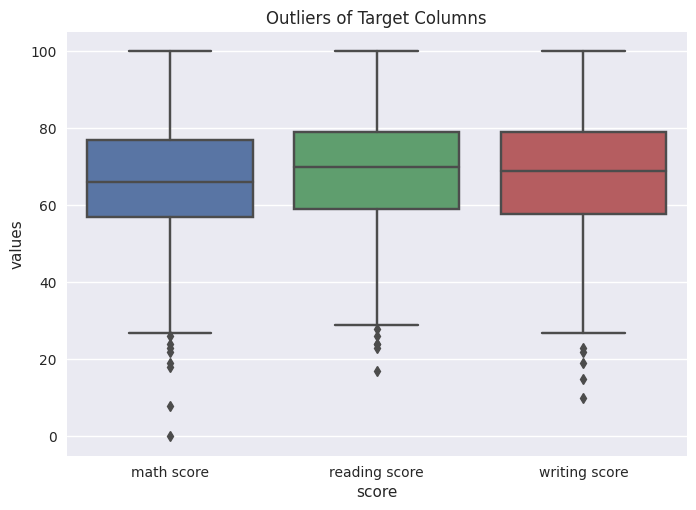

In [18]:
# Outliers of Target Columns
sns.boxplot(data=df[['math score','reading score','writing score']])
plt.xlabel('score')
plt.ylabel('values')
plt.title('Outliers of Target Columns')
plt.show()



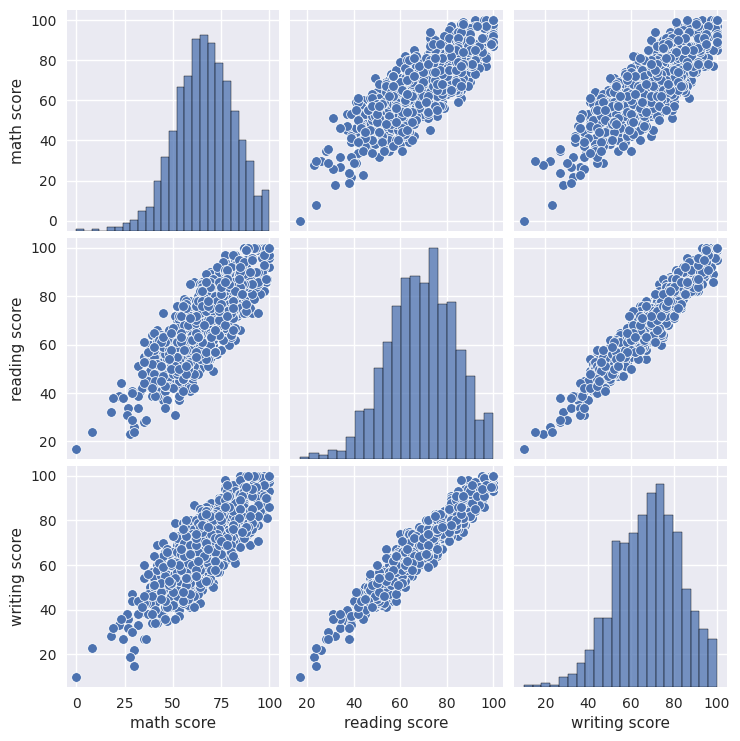

In [19]:
sns.pairplot(df)

Text(0.5, 1.0, 'Distribution of writing score')

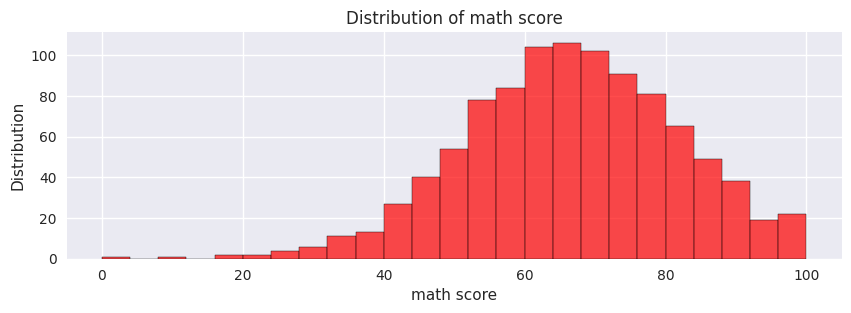

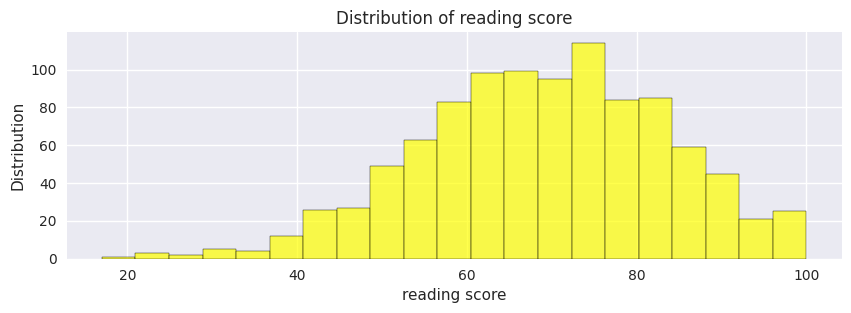

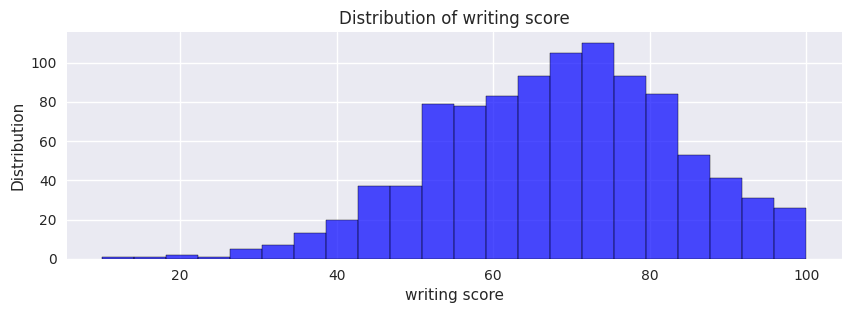

In [20]:
#Distribution of Scores
plt.figure(figsize=(10, 10))
plt.subplot(3,1,1)
sns.histplot(data=df,x=df['math score'],alpha=0.7,color='red')
plt.xlabel('math score')
plt.ylabel('Distribution')
plt.title('Distribution of math score')

plt.figure(figsize=(10, 10))
plt.subplot(3,1,2)
sns.histplot(data=df,x=df['reading score'],alpha=0.7,color='yellow')
plt.xlabel('reading score')
plt.ylabel('Distribution')
plt.title('Distribution of reading score')

plt.figure(figsize=(10, 10))
plt.subplot(3,1,3)
sns.histplot(data=df,x=df['writing score'],alpha=0.7,color='blue')
plt.xlabel('writing score')
plt.ylabel('Distribution')
plt.title('Distribution of writing score')



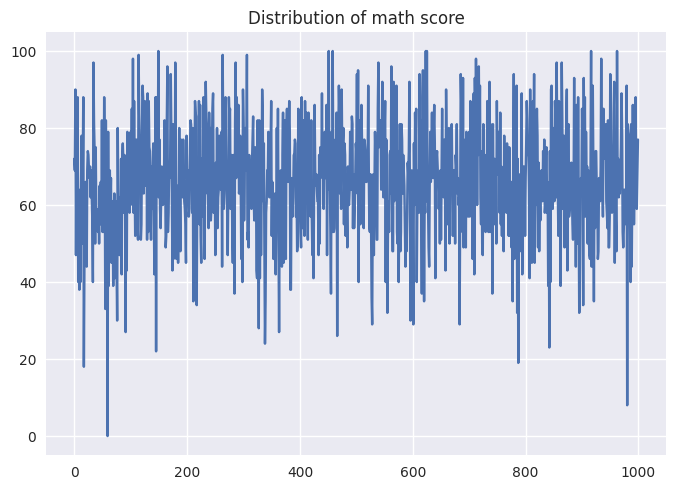

In [21]:
df['math score'].plot()
plt.title('Distribution of math score')
plt.show()

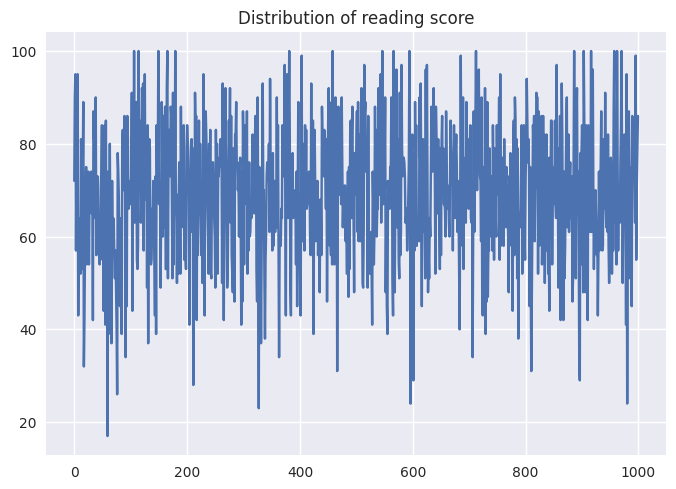

In [22]:
df['reading score'].plot()
plt.title('Distribution of reading score')
plt.show()

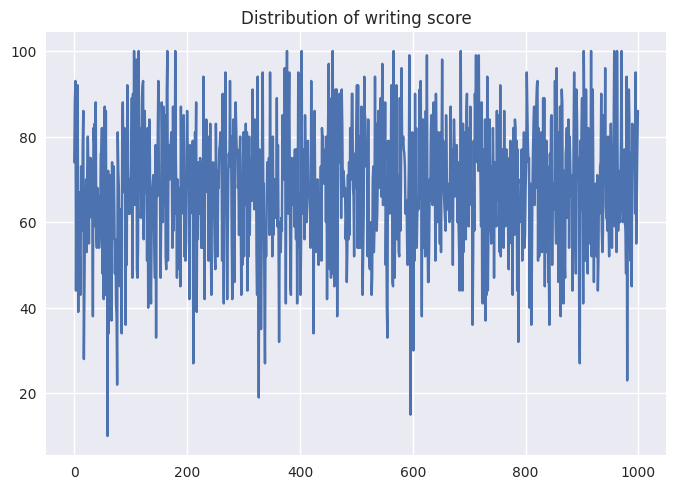

In [23]:
df['writing score'].plot()
plt.title('Distribution of writing score')
plt.show()

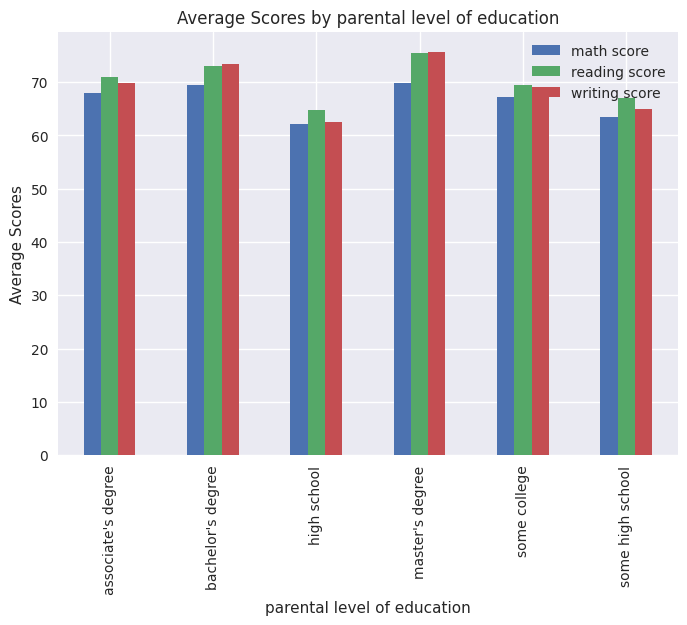

In [24]:
# Average Scores by parental level of education
parent=df.groupby('parental level of education')[['math score','reading score','writing score']].mean()

parent.plot(kind='bar')
plt.xlabel('parental level of education')
plt.ylabel('Average Scores')
plt.title('Average Scores by parental level of education')
plt.show()

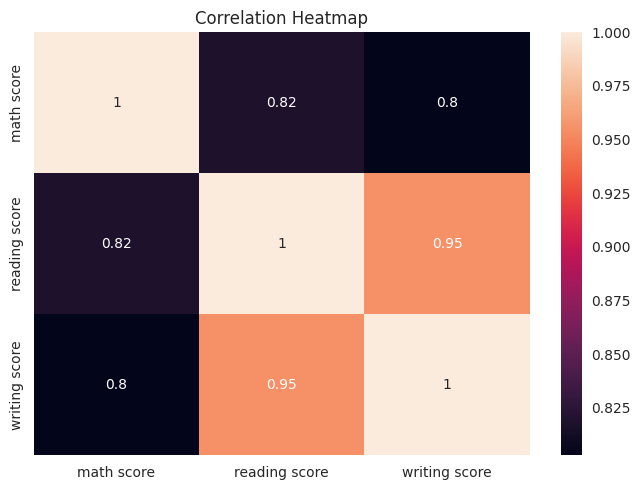

In [25]:
# the correlation of dataset
numeric_columns = df.select_dtypes(include=['number'])
corr = numeric_columns.corr()

sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()